In [1]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import uncertainties 
from uncertainties import *

In [2]:
#Constants and values 

L = 29 #m
S = 0.112e-3**2 * np.pi/4
n = 8.5e28 
e_0 = 1.602e-19
m_e = 9.109e-31

In [3]:
#Importing the data

data = pd.read_excel('FP4_data.xlsx')

In [4]:
data

,t,R
0,21.9,56.7
1,23.3,56.9
2,24.3,57.1
3,25.3,57.2
4,26.5,57.4
5,27.3,57.6
6,28.4,57.8
7,29.7,58.0
8,30.7,58.2
9,31.9,58.3


In [5]:
data['mu'] = L / (e_0 * n * data['R'] * S)
data['tau'] = data['mu'] * e_0 / m_e

In [6]:
data

,t,R,mu,tau
0,21.9,56.7,0.003812,6.705009e+08
1,23.3,56.9,0.003799,6.681442e+08
2,24.3,57.1,0.003786,6.658039e+08
3,25.3,57.2,0.003779,6.646399e+08
4,26.5,57.4,0.003766,6.623241e+08
5,27.3,57.6,0.003753,6.600244e+08
6,28.4,57.8,0.003740,6.577405e+08
7,29.7,58.0,0.003727,6.554725e+08
8,30.7,58.2,0.003714,6.532200e+08
9,31.9,58.3,0.003708,6.520995e+08


In [7]:
#Linear fit

# Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = stats.linregress(data['t'], data['tau'])

# Print fit results
print('slope =', round(slope, 2), '+/-', round(std_err, 2))

#Best fit line 
y_fit = slope * data['t'] + intercept

slope = -1847107.56 +/- 12151.35


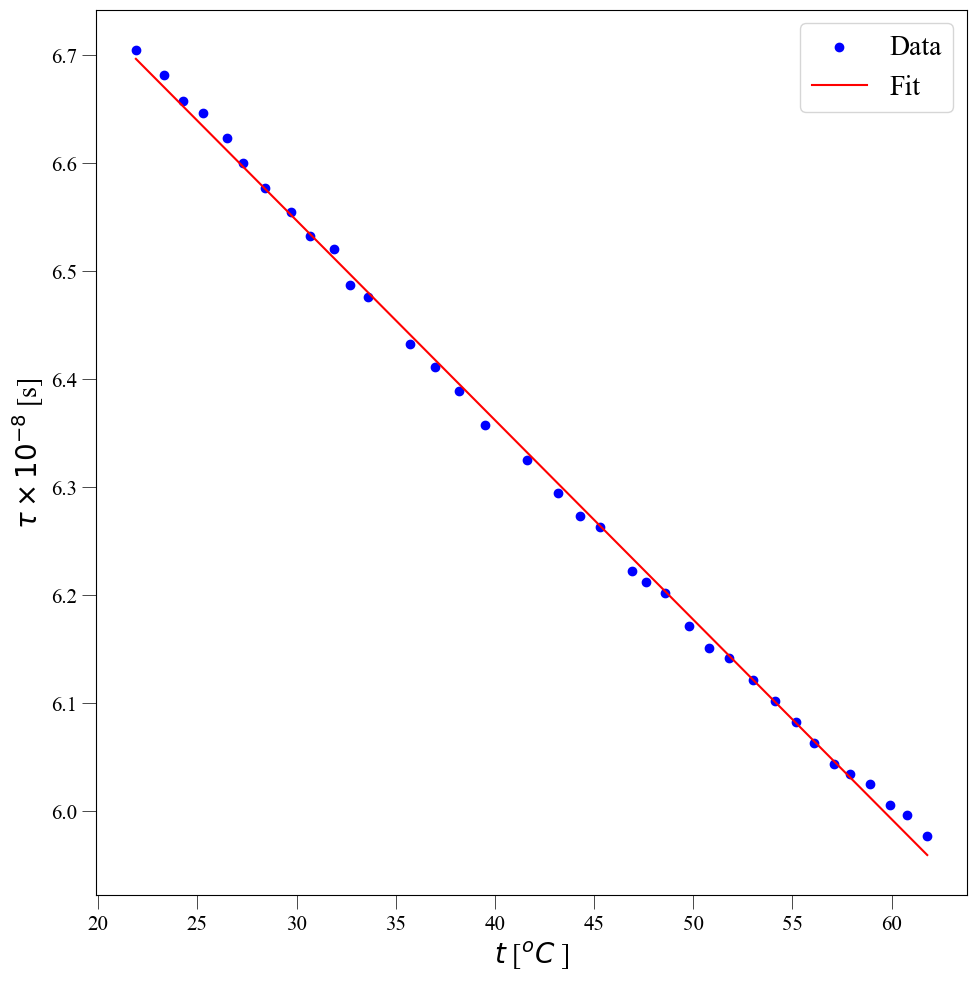

In [8]:
# Plot the data and the best-fit line 

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$t$ [$^oC$ ]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$\tau \times 10^{-8}$ [s]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=15)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=15)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(data['t'], data['tau']*10**(-8), color='blue', label='Data')
ax.plot(data['t'], y_fit*10**(-8), color='red', label='Fit')

ax.legend(loc='upper right', fontsize=20)

plt.show() 

fig.savefig('tau.png', bbox_inches='tight')